# 1)First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

In [139]:
dataset=pd.read_csv("Add_sales_data_2018.csv")

In [140]:
dataset.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


<AxesSubplot:>

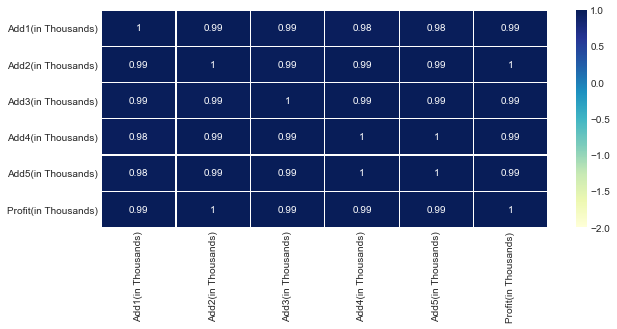

In [157]:
corr_matrix=dataset.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corr_matrix,vmin=-2,vmax=1,annot=True,Linewidths=0.2,cmap='YlGnBu')

### There is high correlation between the profit generated & the amount spent via 5 advertisements. The same can also be obeserved from the pairplots too. Among these; Advertisement2 and Profit generated has a strong positive linear relation. 

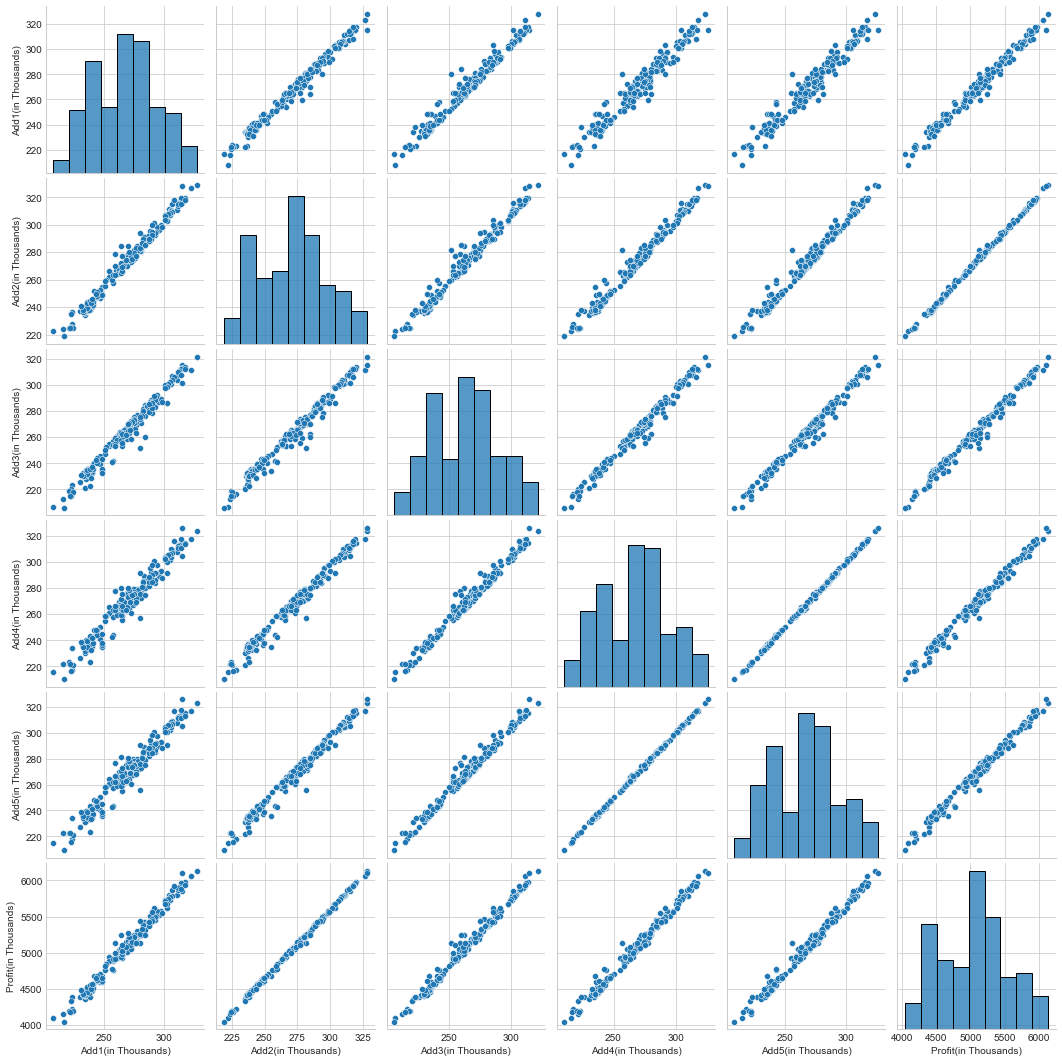

In [142]:
%matplotlib inline 
#to make sure matplot lib prints data visualizations inline
rcParams['figure.figsize']=8,4
plt.style.use('seaborn-whitegrid')
sns.pairplot(dataset)

<AxesSubplot:xlabel='Add2(in Thousands)', ylabel='Profit(in Thousands)'>

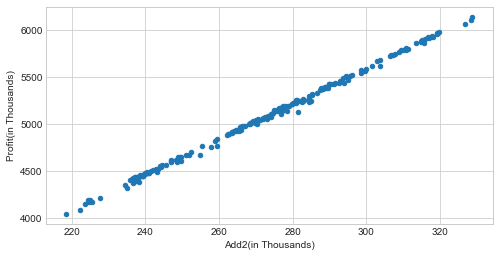

In [143]:
dataset.plot(kind='scatter',x='Add2(in Thousands)',y='Profit(in Thousands)')

## <u>Observation</u>
The amount spent for advertising through five different companies and profit generated is highly correlated and the strongest corelation is observed in add2 vs profit generated which is linear

# 2)Build a regression model to predict the profit from the given data and comment your findings on it.

## Since all the advertisements have strong positive correlation values with profit generated; the model can be build upon two methods;

### (i)Considering, Add2 as the one and only independent variable(since it has a correlation value of 1 with the profit generated) & reducing the rest of the features (<i>See Data1</i>)


### (ii)Since all the advertisements are showing correlation values of 0.99 and above with the profit generated; They all can be assumed to have contributing to the profit. So this case offers all 5 advertisement spendings as independent variables (<i>See Data2</i>)

In [144]:
dataset.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


## No null values are present

In [146]:
data1=dataset.drop(['Date','Add1(in Thousands)','Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)'],axis=1)
data2=dataset.drop(['Date'],axis=1)

In [147]:
y=data1['Profit(in Thousands)'] 
x=data1.drop(['Profit(in Thousands)'],axis=1) #For Case(i)

b=data2['Profit(in Thousands)'] 
a=data2.drop(['Profit(in Thousands)'],axis=1) #For Case(ii)



In [148]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25) #For Case(i)

a_train,a_test,b_train,b_test=train_test_split(a,b,random_state=42,test_size=0.25) #For Case(ii)

In [149]:
from sklearn import linear_model 
lr1=linear_model.LinearRegression()#For Case(i)
lr2=linear_model.LinearRegression()#For Case(ii)


In [150]:
model1=lr1.fit(x_train,y_train) 
model2=lr2.fit(a_train,b_train) 

In [151]:
prediction1=model1.predict(x_test)
prediction2=model2.predict(a_test)

### Actual & Predicted Profit Values - Case(i)

In [152]:
profit_test_values=pd.DataFrame(y_test)
profit_test_values.reset_index(drop=True, inplace=True)
profit_test_values.columns=['Actual test values of profit']
profit_predictions=pd.DataFrame(prediction1)
profit_predictions.columns=['Profit predicted using linear regression']
ex_col=profit_predictions['Profit predicted using linear regression']
profit_test_values.join(ex_col)

,Actual test values of profit,Profit predicted using linear regression
0,4152.066,4155.905210
1,4446.441,4447.632917
2,5131.898,5240.944067
3,4907.560,4904.986676
4,5004.282,4997.210274
5,4623.793,4619.846369
6,5384.175,5384.925806
7,5328.025,5337.872950
8,5175.051,5158.131041
9,5956.323,5951.442191


### Actual & Predicted Profit Values - Case(ii)

In [153]:
profit_test_values2=pd.DataFrame(b_test)
profit_test_values2.reset_index(drop=True, inplace=True)
profit_test_values2.columns=['Actual test values of profit']
profit_predictions2=pd.DataFrame(prediction2)
profit_predictions2.columns=['Profit predicted using linear regression']
ex_col2=profit_predictions2['Profit predicted using linear regression']
profit_test_values2.join(ex_col2)

,Actual test values of profit,Profit predicted using linear regression
0,4152.066,4152.066
1,4446.441,4446.441
2,5131.898,5131.898
3,4907.560,4907.560
4,5004.282,5004.282
5,4623.793,4623.793
6,5384.175,5384.175
7,5328.025,5328.025
8,5175.051,5175.051
9,5956.323,5956.323


In [154]:
from sklearn.metrics import mean_squared_error
print("MSE in case(i)- When Advertisement 2 is the only independent variable",mean_squared_error(y_test,prediction1))

print("MSE in case(ii)- When all the each of the 5 Advertisements are considered as the independent variables",mean_squared_error(b_test,prediction2))

MSE in case(i)- When Advertisement 2 is the only independent variable 463.55463495588543
MSE in case(ii)- When all the each of the 5 Advertisements are considered as the independent variables 6.362927788869444e-25


## <u>Observation:</u>

Mean square error in first case is high; whereas when all the five advertisement spendings are considered , the prediction model improves the efficiency of prediction by reducing the errror value.

# 3)Predict the profit generated by the company, if they wish to spend the following amount for advertisement

|Add1(in Thousands)| 290 |
| :- | -: |
|Add2(in Thousands)| 312 |
|Add3(in Thousands)| 309 |
|Add4(in Thousands)| 298 |
|Add5(in Thousands)| 320 |


## Here we can check the profit prediction by the two linear regression models; and compare the difference in profit predictions.

### But one important thing to be note here is that; for case(i)- the model made is purely dependent on Add2 spendings ; which means add2 spending is the only acceptable input to model1

### for case(ii); all the 5 advertisement spendings can be considerd as the input

In [155]:
only2=[[312]]
all5=[[290,312,309,298,320]]
profit_predicted1=model1.predict(only2).item()
profit_predicted2=model2.predict(all5).item()
relative_diff=profit_predicted2-profit_predicted1

print("the anticipated profit(in thousands) from the advertisements(case-i(only add2)) is %0.2f"%profit_predicted1)
print("the anticipated profit(in thousands) from the advertisements(case-ii(all 5 ads)) is %0.2f"%profit_predicted2)

print("The relative difference between the two predictions is %0.2f"%relative_diff)


the anticipated profit(in thousands) from the advertisements(case-i(only add2)) is 5817.81
the anticipated profit(in thousands) from the advertisements(case-ii(all 5 ads)) is 5820.06
The relative difference between the two predictions is 2.25


# <u>Observations</u>


### (a) Both the models created predicted almost same profit values for the above set of advertisement spendings.  

### (b) But, its easier to see that even with such additional spendings on advertisements other than <u>Add2;</u> there is only very small increase in profit(as small as 2.25(in thousands)).

### (c) So the company could avoid spendings on advertisements via add1,add3,add4,add5 and save lots of money; without any significant loss of profits. <u>So Only spending through add2 is sufficient to sustain the profits!!</u>